In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.grid_search import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
%matplotlib inline

## Pre-Task: Describe the goals of your study

## Part 1: Aquire the Data

#### 1. Connect to the remote database, 2. Query the database and aggregate the data, 5. What are the risks and assumptions of our data?

#### !!NOTE!! I experiened package configuration issues when approaching the SQL portion of this project and simply the read data in from the attached .csv file.  Patrick told me to just note this (done here!) and move on rather than retroactively inputing this from the remote DB.

Initial Reading in of the Data from the .csv file

In [24]:
data_raw = pd.DataFrame(pd.read_csv('train.csv'))

## Part 2: Exploratory Data Analysis

#### 1. Describe the Data

In [25]:
print len(data_raw), 
print data_raw.sum(), 
print data_raw.head(), 
print data_raw.dtypes, 
print data_raw.describe()

891 PassengerId    397386.0000
Survived          342.0000
Pclass           2057.0000
Age             21205.1700
SibSp             466.0000
Parch             340.0000
Fare            28693.9493
dtype: float64    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1     

In [11]:
data_raw.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The data describes many characteristics of passengers on the Titanic (including their paid Fare, Class, Age, port of origin, their numer of siblings(if applicable), their number of children(if applicable), and a binary value indicating whether or not they survived the disaster itself.  The age column contails 177 null values, and the cabin contails 687 total null values... I plan on solving this by not using the Cabin value in my models, and dropping all passengers whose age is a null value as this will still give me enough information to model with w/o having to make intuitions.

#### 2. Visualize the Data

histrogram of age, dropped NA age values

(array([  54.,   46.,  177.,  169.,  118.,   70.,   45.,   24.,    9.,    2.]),
 array([  0.42 ,   8.378,  16.336,  24.294,  32.252,  40.21 ,  48.168,
         56.126,  64.084,  72.042,  80.   ]),
 <a list of 10 Patch objects>)

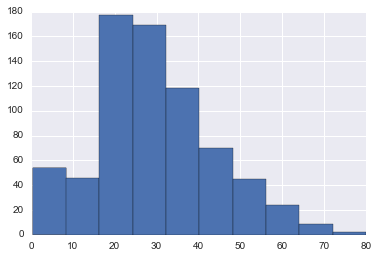

In [9]:
age_hist = data_raw['Age'].sort_values()
age_hist.dropna(inplace=True)
plt.hist(age_hist)

plotting distribution of fare values with high value outliers removed (the outliers made it extremely difficult to view the patterns in the data)

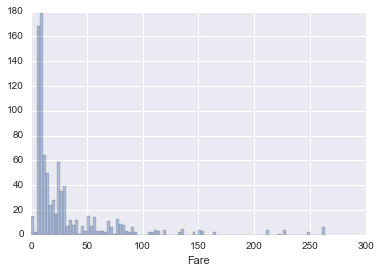

In [12]:
fare_hist = data_raw['Fare'].sort_values()
fare_hist = fare_hist.where(fare_hist < 300).sort_values()
fare_hist.dropna(inplace=True)
sns.distplot(fare_hist, kde= False, bins = 100)

## Part 3: Data Wrangling

#### 1. Create Dummy Variables for *Sex* 

In [26]:
sex_dummies = pd.get_dummies(data_raw['Sex'])
data_raw= data_raw.drop(['Sex'], axis=1)
data_raw = pd.concat([data_raw, sex_dummies], axis=1)

creating dummy variables for class & cleanning the non-predictive/null value columns from the data Frame

In [27]:
data_raw = data_raw.drop(['Cabin', 'Ticket', 'Name'], axis=1)
class_dummies = pd.get_dummies(data_raw['Pclass'])
data_raw = data_raw.drop(['Pclass'], axis=1)
data_raw = pd.concat([data_raw, class_dummies], axis=1)

dropping null values from the data frame as per above

In [28]:
data_raw.dropna(inplace=True)

## Part 4: Logistic Regression and Model Validation

#### 1. Define the variables that we will use in our classification analysis

In [33]:
mask = ['Age', 'SibSp', 'Parch', 'Fare', 'female', 'male', 1, 2, 3]
X = data_raw[mask]

#### 2. Transform "Y" into a 1-Dimensional Array for SciKit-Learn

In [34]:
y = data_raw['Survived']

#### 3. Conduct the logistic regression

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [46]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### 4. Examine the coefficients to see our correlations

In [43]:
print X.columns
lr.coef_

Index([u'Age', u'SibSp', u'Parch', u'Fare', u'female', u'male', 1, 2, 3], dtype='object')


array([[-0.0393573 , -0.3695578 , -0.08118767,  0.00282379,  1.60056346,
        -0.87456487,  1.47046273,  0.10575287, -0.85021701]])

#### 6. Test the Model by introducing a *Test* or *Validaton* set 

In [44]:
lr.score(X_test, y_test)

0.8146067415730337

#### 7. Predict the class labels for the *Test* set

In [47]:
lr.predict(X_test)

array([0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

#### 8. Predict the class probabilities for the *Test* set

In [49]:
lr.predict_proba(X_test)

array([[ 0.94257832,  0.05742168],
       [ 0.89954901,  0.10045099],
       [ 0.09231614,  0.90768386],
       [ 0.11544819,  0.88455181],
       [ 0.43026048,  0.56973952],
       [ 0.55999778,  0.44000222],
       [ 0.85850257,  0.14149743],
       [ 0.24530406,  0.75469594],
       [ 0.89591861,  0.10408139],
       [ 0.36429739,  0.63570261],
       [ 0.80585836,  0.19414164],
       [ 0.69068802,  0.30931198],
       [ 0.44961607,  0.55038393],
       [ 0.93829122,  0.06170878],
       [ 0.68156047,  0.31843953],
       [ 0.17311296,  0.82688704],
       [ 0.26129611,  0.73870389],
       [ 0.90095202,  0.09904798],
       [ 0.86780686,  0.13219314],
       [ 0.56017407,  0.43982593],
       [ 0.21168719,  0.78831281],
       [ 0.4882027 ,  0.5117973 ],
       [ 0.9134401 ,  0.0865599 ],
       [ 0.05679037,  0.94320963],
       [ 0.80069905,  0.19930095],
       [ 0.05857638,  0.94142362],
       [ 0.10091642,  0.89908358],
       [ 0.61615965,  0.38384035],
       [ 0.72403588,

#### 9./10. Evaluate the *Test* set (did so above and through Cross Validation)

In [50]:
cross_val_score(lr, X, y, cv=5)

array([ 0.76223776,  0.83216783,  0.76223776,  0.76056338,  0.82269504])

#### 11. Check the Classification Report

In [67]:
print classification_report(y_test, logreg_preds)

             precision    recall  f1-score   support

          0       0.80      0.90      0.85       104
          1       0.84      0.69      0.76        74

avg / total       0.82      0.81      0.81       178



#### 12. What do the classification metrics tell us?

The classification metrics give us a variety of information regarding the ability of our models to accurately predict whether or not a given passenged on the Titanic died.  The precision is calculated by measuring the the True Positives(TP)/all predictived positives (TP + False Positives(FP)).  Practically speaking, this is an indicator of our model's ability to minimize False Positives.  

The Recall Value measures our ability to minimize False Negatives and is calculated much the same way as precision (TN/TN+FN).  

The F1 score is a statistic that uses both the precision and recall to make a weighted score for how our model performs (respective to the classication categories).  

Using these scores I am able to say that my model is overly optimistic(or pessimistic in this case, womp...) in predicting that a passenger on the Titanic died and could be improved by prediciting more passenger survival.  Conversely, my model has a very strong recall score in regards to predicting if a passenger died.  This intuitively makes sens as more people died on the Titanic than survived.   

#### 13. Check the Confusion Matrix

In [54]:
print confusion_matrix(y_test, logreg_preds)

[[94 10]
 [23 51]]


#### 14. What does the Confusion Matrix tell us? 

The confusion matrix gives the number of false negatives, false positives, true negatives, and true positives when running the model on a test set of data.  These scores are used to calculate the recall, precision, and f1 values above.  My model in this case accurately predicted (on the test set) that 94 people died and 51 survived, while incorrectly predicting that 10 people survived and 23 did not.  

#### 15. Plot the ROC curve

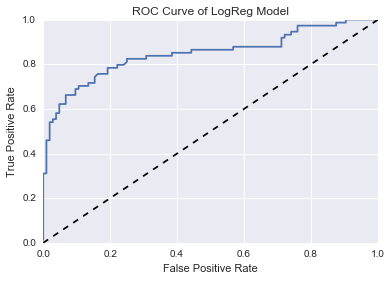

In [72]:
proba = lr.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, proba[:,1])

plt.figure()
plt.plot(fpr, tpr, label= 'ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve of LogReg Model')
plt.show()

#### 16. What does the ROC curve tell us?

The ROC Curve is a visualization of the accuracy of a given model which is exhibited through plotting the FPR vs. the TPR.  a perfect model would hug the y-axis until it reached top of the constraints, and would then hug the top of the constraint across the x-axis.  

## Part 5: Gridsearch

#### 1. Use GridSearchCV with logistic regression to search for optimal parameters 

- Use the provided parameter grid. Feel free to add if you like (such as n_jobs).
- Use 5-fold cross-validation.

In [56]:
logreg_parameters = {
    'penalty':['l1','l2'],
    'C':np.logspace(-5,1,50),
    'solver':['liblinear']}

In [57]:
classifier = LogisticRegression()
gridsearch = GridSearchCV(classifier, logreg_parameters, cv=5)
gridsearch.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'penalty': ['l1', 'l2'], 'C': array([  1.00000e-05,   1.32571e-05,   1.75751e-05,   2.32995e-05,
         3.08884e-05,   4.09492e-05,   5.42868e-05,   7.19686e-05,
         9.54095e-05,   1.26486e-04,   1.67683e-04,   2.22300e-04,
         2.94705e-04,   3.90694e-04,   5.17947e-04,   6.8...6e+00,   4.29193e+00,   5.68987e+00,
         7.54312e+00,   1.00000e+01]), 'solver': ['liblinear']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

#### 2. Print out the best parameters and best score. Are they better than the vanilla logistic regression?

In [60]:
print gridsearch.best_params_
gridsearch.best_score_

{'penalty': 'l2', 'C': 0.035564803062231289, 'solver': 'liblinear'}


0.7893258426966292

#### 3. Explain the difference between the difference between the L1 (Lasso) and L2 (Ridge) penalties on the model coefficients.

L1 (Lasso) coefficent regularization uses a coefficient penalty that is the absolute values of the coefficients & allows the coefficents to move towards a 0 value.  This is useful for helping to eliminate Type 1 errors aka false positives.  

L2(Ridge) uses a the sume of the squares of the coefficients as a penalty, and does not allow the coefficients to move towards zero.  This helps negate type 2 errors aka false negatives.  

#### 4. What hypothetical situations are the Ridge and Lasso penalties useful?

Lasso is useful to help models which have a high number of outliers in the predictive variables.  As above, Lasso regression is useful to eliminate type 1 errors, while Ride is useful for eliminating type 2 errors.  

## Part 6: Gridsearch and kNN

#### 1. Perform Gridsearch for the same classification problem as above, but use KNeighborsClassifier as your estimator

At least have number of neighbors and weights in your parameters dictionary.

In [63]:
kvals = range(1,51)
neigh_parameters = {'n_neighbors':kvals, 'weights':['uniform','distance']}

neigh = KNeighborsClassifier()
neighbors_gridsearch = GridSearchCV(neigh, neigh_parameters, cv=5)
neighbors_gridsearch.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

#### 2. Print the best parameters and score for the gridsearched kNN model. How does it compare to the logistic regression model?

In [65]:
print neighbors_gridsearch.best_score_
neighbors_gridsearch.best_params_

0.709269662921


{'n_neighbors': 22, 'weights': 'uniform'}

#### 3. How does the number of neighbors affect the bias-variance tradeoff of your model? [BONUS] Why?

A KNN Classification model with n_neighbors = 1 is a model with very high variance.  This is because the model's decision making parameters would need to be very irregular to accomodate a high degree of variability when making predictions.  As n_neighbors increases, the predictive value of a single point decreases and allows for a smoother decision boundry and a decrease in the variance of your model.  

#### 4. In what hypothetical scenario(s) might you prefer logistic regression over kNN, aside from model performance metrics?

KNN is useful when your model skews towards primarily classification (compared to linear) variables.  Logistic regression is better when the predictive variables are primarily linear values.  

#### 5. Fit a new kNN model with the optimal parameters found in gridsearch. 

In [76]:
neigh2 = KNeighborsClassifier(n_neighbors=22, weights='uniform')
neigh2.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=22, p=2,
           weights='uniform')

#### 6. Construct the confusion matrix for the optimal kNN model. Is it different from the logistic regression model? If so, how?

In [84]:
neigh2.fit(X_train, y_train)
knn_preds = neigh2.predict(X_test)
matrix = confusion_matrix(y_test, knn_preds)
print neigh2.score(X_test, y_test)
print matrix

0.674157303371
[[85 19]
 [39 35]]


The confusion matrix for the optimized KNN model performs more poorly than my original model.  This is most likely due to the fact that the most important predictive variable (fare) was the best predictor, and was not used as efficiently in the KNN model.  The matrix shows an increase in both false negatives and false positives.  